# Practical Time Series Analysis

## Week 5: Akaike Information Criterion (AIC), Mixed Models, Integrated Models

**1. Akaike Information Criterion (AIC)**

**2. Mixed models: ARMA, ARIMA**

**3. Real-world datasets**

In [34]:
library(forecast)
library(astsa)


Attaching package: 'astsa'

The following object is masked from 'package:forecast':

    gas



## 1. Akaike Information Criterion (AIC)

AIC is similar to $R^2$ metric in the sense that both consider a regularization rate that varies directly proportionally with the order of the terms present in the regression.

**Simulation Example**

$X_t = Z_t + 0.7 X_{t-1} - 0.2 X_{t-2}$

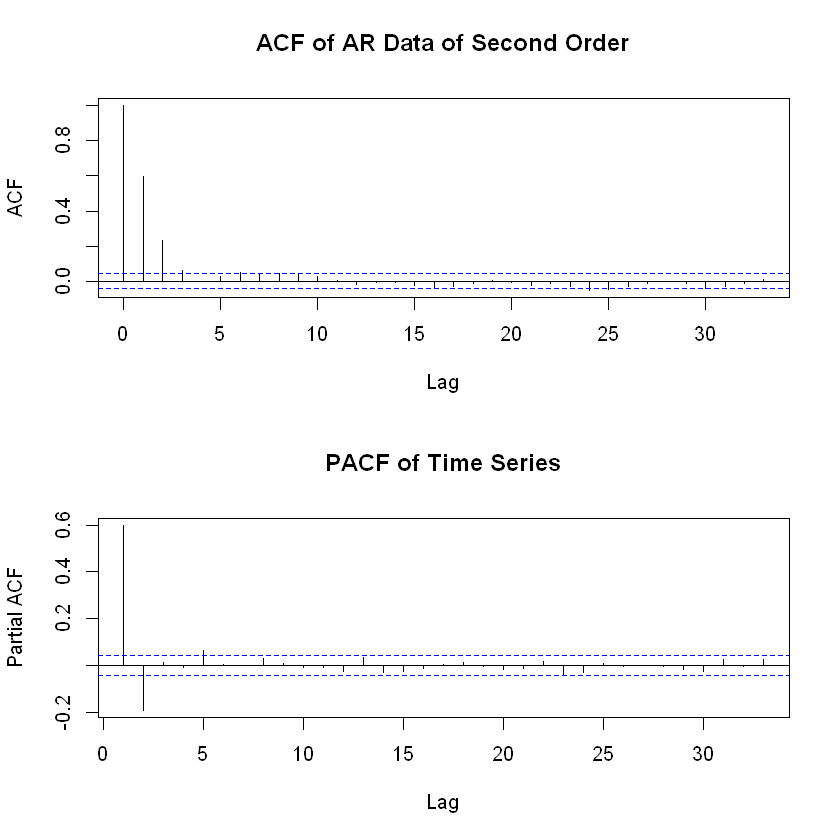

In [3]:
# simulation example
set.seed(43)
data = arima.sim(list(order = c(2,0,0), ar = c(0.7, -0.2)), n = 2000)
par(mfrow = c(2, 1))
acf(data, main = "ACF of AR Data of Second Order")
acf(data, type = "partial", main = "PACF of Time Series")

In [4]:
SSE=NULL
AIC=NULL
for (p in 1:5) {
    m = arima(data, order=c(p,0,0), include.mean=FALSE )
    SSE[p] = sum(resid(m)^2)
    AIC[p] = m$aic
    print( m$coef )
    print( paste(m$aic, sum(resid(m)^2)) )
}

      ar1 
0.5969948 
[1] "5751.73196762524 2072.83193501059"
       ar1        ar2 
 0.7111457 -0.1911552 
[1] "5679.27375222458 1997.00667996082"
        ar1         ar2         ar3 
 0.71359315 -0.20027406  0.01281966 
[1] "5680.94495534325 1996.67791506654"
         ar1          ar2          ar3          ar4 
 0.713676747 -0.201599645  0.017553047 -0.006629412 
[1] "5682.85704377107 1996.58997811327"
        ar1         ar2         ar3         ar4         ar5 
 0.71410825 -0.20268672  0.03019322 -0.05154692  0.06293048 
[1] "5676.91730818182 1988.65973372245"


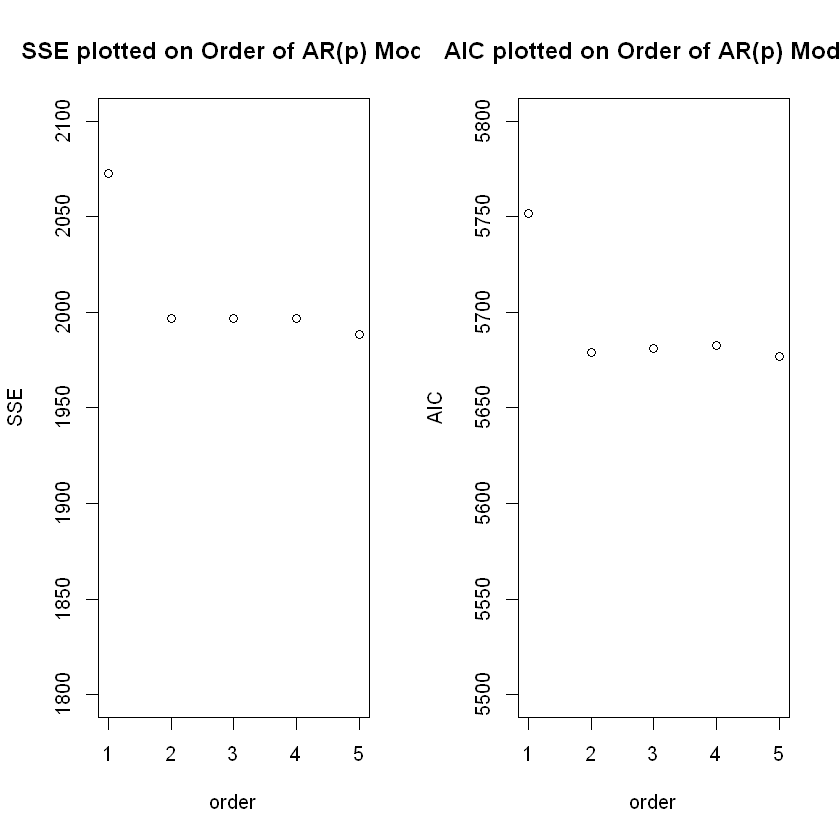

In [5]:
par(mfrow=c(1,2))
order=c(1,2,3,4,5)
plot(SSE~order, main="SSE plotted on Order of AR(p) Model", ylim=c(1800, 2100))
plot(AIC~order, main="AIC plotted on Order of AR(p) Model", ylim=c(5500, 5800))

It can be seen that AIC falls down agressively between order 1 and 2, and remains almost the same on the rest.

**The AIC**

Assess the relative quality of several competing models

* Give credit for models which reduce the error sum of squares
* Build a penalty for models which bring in too many parameters

Formula

$AIC = -2 \cdot log(maximum \; likelihood) + 2 \cdot (number \; of \; paramenters \; in \; the \; model)$

Simple version for the AIC of a givern model with $p$ terms:

$ AIC = log(\hat{\sigma}^2) + \frac{n + 2 \cdot p}{n}$

, where $\hat{\sigma}^2 = \frac{SSE}{n}$

## 2. Mixed Models: ARMA, ARIMA

### 2.1. ARMA

**ARMA(p, q) Definition**

Bring together an MA(q) and an AR(p)

$X_t = \color{green}{Noise} + \color{blue}{AutoRegressive Part} + \color{yellow}{Moving Average Part}$

$X_t = \color{green}{Z_t} + \color{blue}{\phi_1 X_{t-1} + ... + \phi_p X_{t-p}} + \color{yellow}{\theta_1 X_{t-1} + ... + \theta_p X_{t-p}}$

**Mixed process to Moving Average process (Backward Shift Operator)**

$\theta (B) Z_t = \phi (B) X_t$

$\frac{\theta(B)}{\phi(B)} Z_t = X_t$

**Mixed process to Auto Regressive process (Backward Shift Operator)**

$\theta (B) Z_t = \phi (B) X_t$

$Z_t = \frac{\phi(B)}{\theta(B)} X_t$

**Code Example**

$X_t = 0.7 X_{t-1} + Z_t + 0.2 Z_{t-1}$

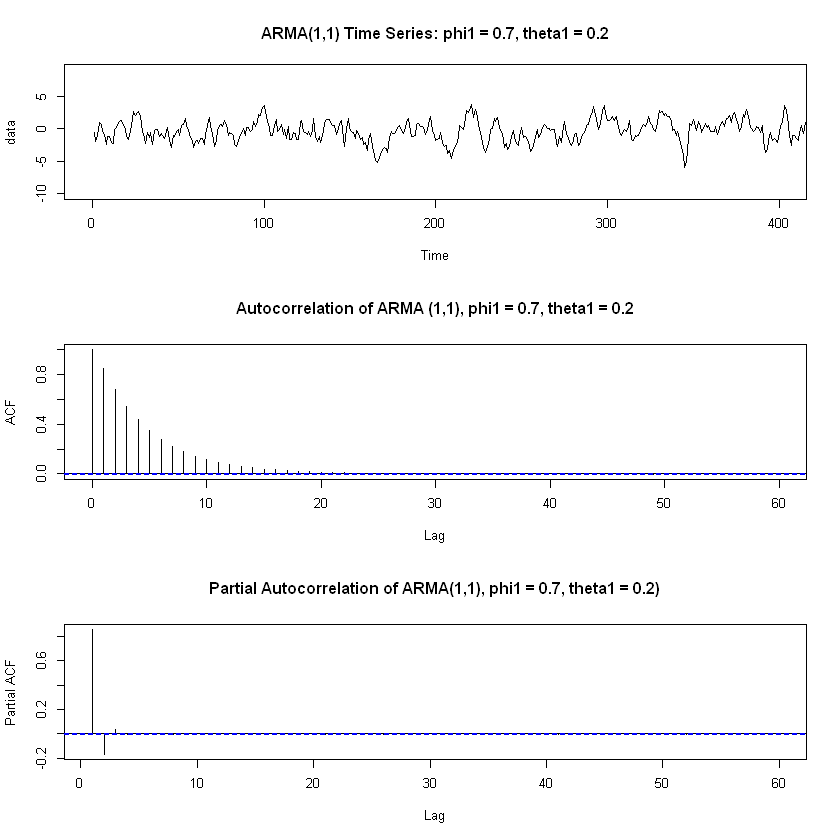

In [6]:
set.seed(500)
data = arima.sim(list(order = c(1, 0, 1), ar = 0.8, ma = 0.2), n = 1000000)
par(mfcol = c(3,1))
plot(data, main = "ARMA(1,1) Time Series: phi1 = 0.7, theta1 = 0.2", xlim = c(0, 400))
acf(data, main = "Autocorrelation of ARMA (1,1), phi1 = 0.7, theta1 = 0.2")
acf(data, type = "partial", main = "Partial Autocorrelation of ARMA(1,1), phi1 = 0.7, theta1 = 0.2)")

* $(1 - 0.7 B) X_t = (1 + 0.2 B) Z_t$

* $\theta(B) = 1 + \beta_1B = 1 + 0.2B$

* $\phi(B) = 1 - \alpha_1 B = 1 - 0.7 B$

Turning denominator into geometric series:

* $\phi(B) = \frac{\phi (B)}{\theta (B)} = 1 - 0.9 B + 0.18 B^2 - 0.036 B^3 + ...$

**Dataset example: Discoveries**

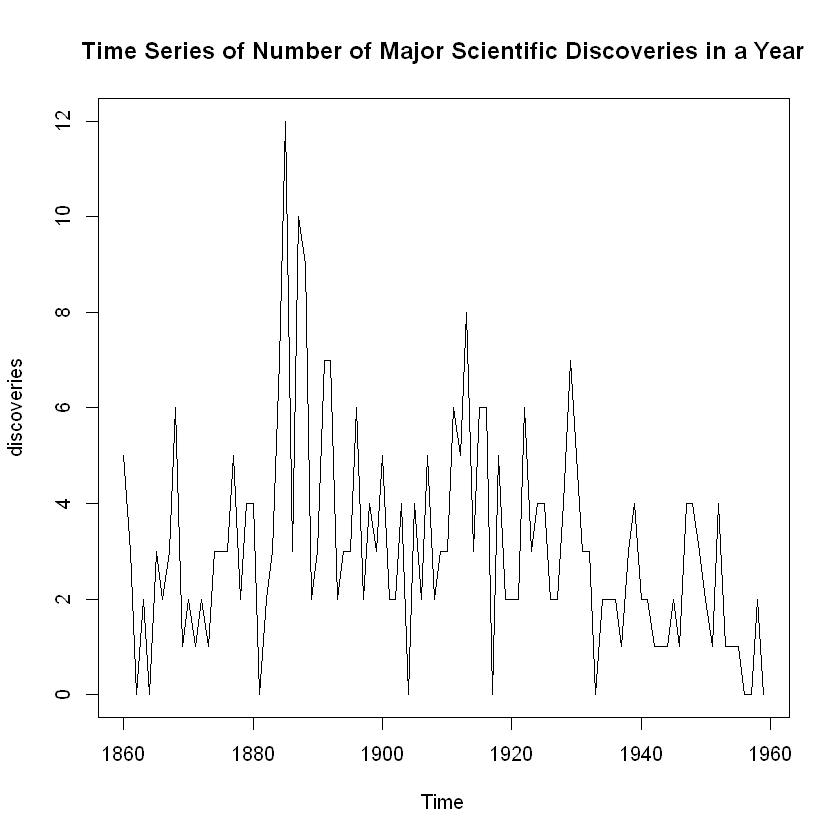

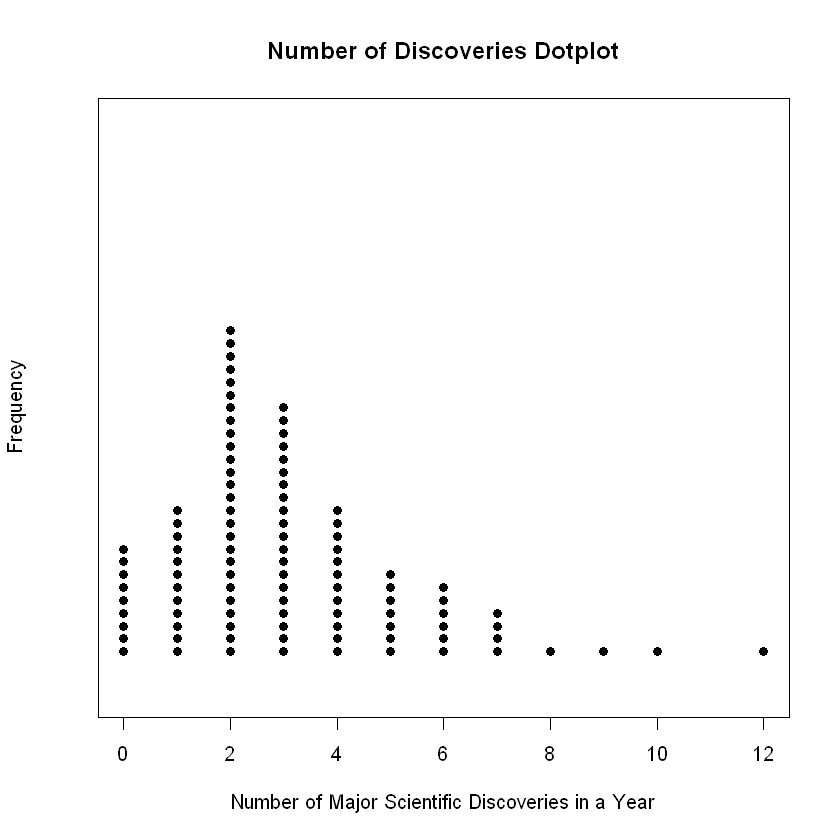

In [7]:
plot(discoveries,
main = "Time Series of Number of Major Scientific Discoveries in a Year")

stripchart(discoveries, method = "stack", offset=.5, at=.15,pch=19,
main="Number of Discoveries Dotplot",
xlab="Number of Major Scientific Discoveries in a Year",
ylab="Frequency")

In a ARMA model, both ACF and PACF tails off indefinitely.

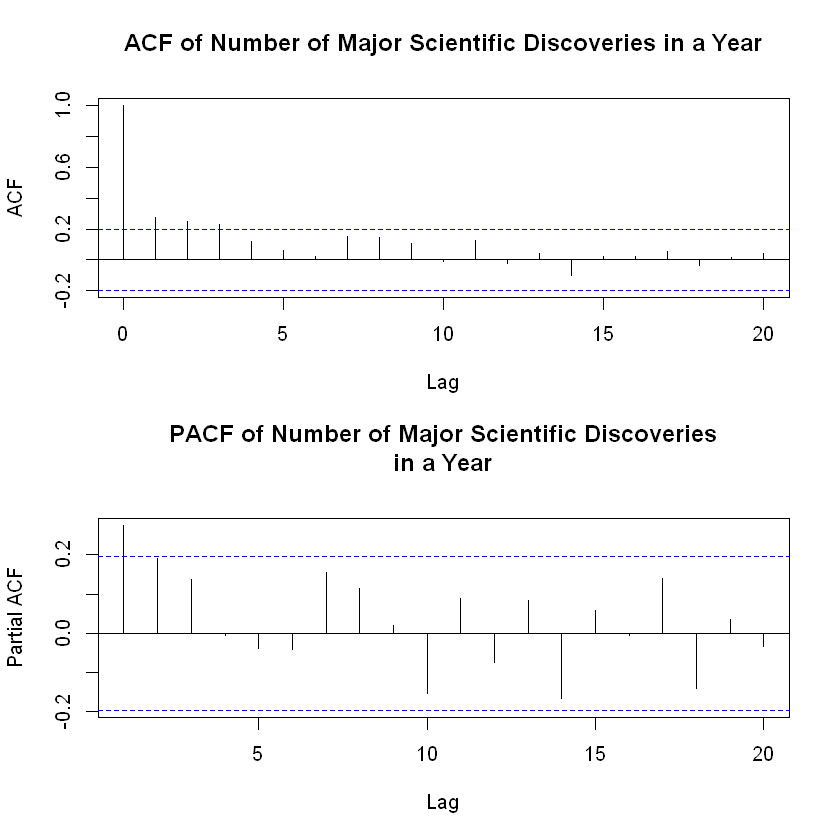

In [8]:
par(mfcol = c(2,1 ))
acf(discoveries, main="ACF of Number of Major Scientific Discoveries in a Year")
acf(discoveries, type="partial", main="PACF of Number of Major Scientific Discoveries
in a Year")

In [9]:
# best ARMA model = ARMA(1,0,1)
arima(x = discoveries, order = c(1, 0, 1))


Call:
arima(x = discoveries, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.8353  -0.6243     3.0208
s.e.  0.1379   0.1948     0.4728

sigma^2 estimated as 4.401:  log likelihood = -216.1,  aic = 440.2

In [10]:
# auto arima
auto.arima(discoveries, d=0, approximation=FALSE)

Series: discoveries 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1    mean
      0.8353  -0.6243  3.0208
s.e.  0.1379   0.1948  0.4728

sigma^2 estimated as 4.538:  log likelihood=-216.1
AIC=440.2   AICc=440.62   BIC=450.62

### 2.2. ARIMA

ARIMA is the ARMA model plus an "I", which means integrated, a process which removes trend from the data.

* Real life datasets are non stationary
* They might have a systematic change in trend
* We need to remove trend
* Difference operator: $\nabla = 1 - B$

A process $X_t$ is Autoregressive INTEGRATED Moving Average of order $(p, d, q)$ if:

$Y_t = \nabla^d X_t = (1 - B)^d X_t$

After differenciating $Y_t$ $d$ times, we have a ARMA model with order $(p, q)$.

**Modeling Guideline**

* Trend suggests differencing
* Variation in variance suggests transformation
* Common transformation: log, then differencing
* It is also known as log-return
* ACF suggests order of moving average process (q)
* PACF suggests order of autoregressive process (p)
* Akaike Information Criterion (AIC) as an evaluation metric
* Sum of squared errors (SSE) as an evaluation metric
* Ljung-Box Q-statistics as an evaluation metric

### 2.3. Q-Statistic

* Null Hypothesis: several autocorrelation coefficients are zero

## 3. Real World Datasets

### 3.1. Daily female births in California in 1959

In [38]:
# read data to R variable
birth.data<-read.csv("../data/daily-total-female-births-in-cal.csv")

# pull out number of births column
number_of_births<-birth.data$Daily.total.female.births.in.California..1959

# use date format for dates
birth.data$Date <- as.Date(birth.data$Date, "%m/%d/%Y")

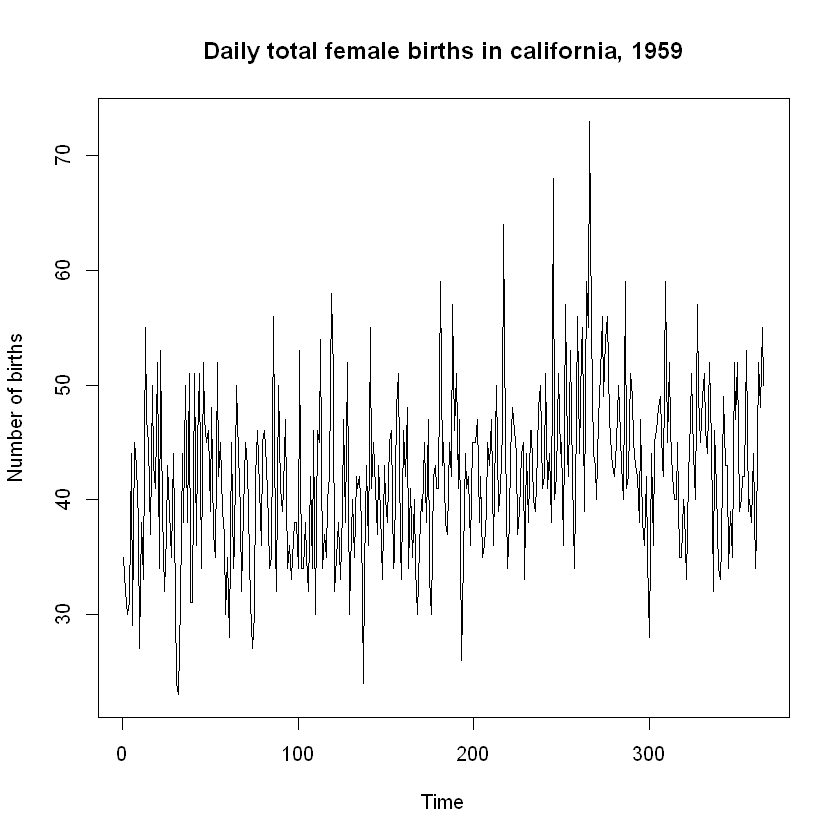

In [39]:
plot.ts(number_of_births,main='Daily total female births in california, 1959', ylab = 'Number of births')

In [40]:
# Test for correlation
Box.test(number_of_births, lag = log(length(number_of_births)))


	Box-Pierce test

data:  number_of_births
X-squared = 36.391, df = 5.8999, p-value = 2.088e-06


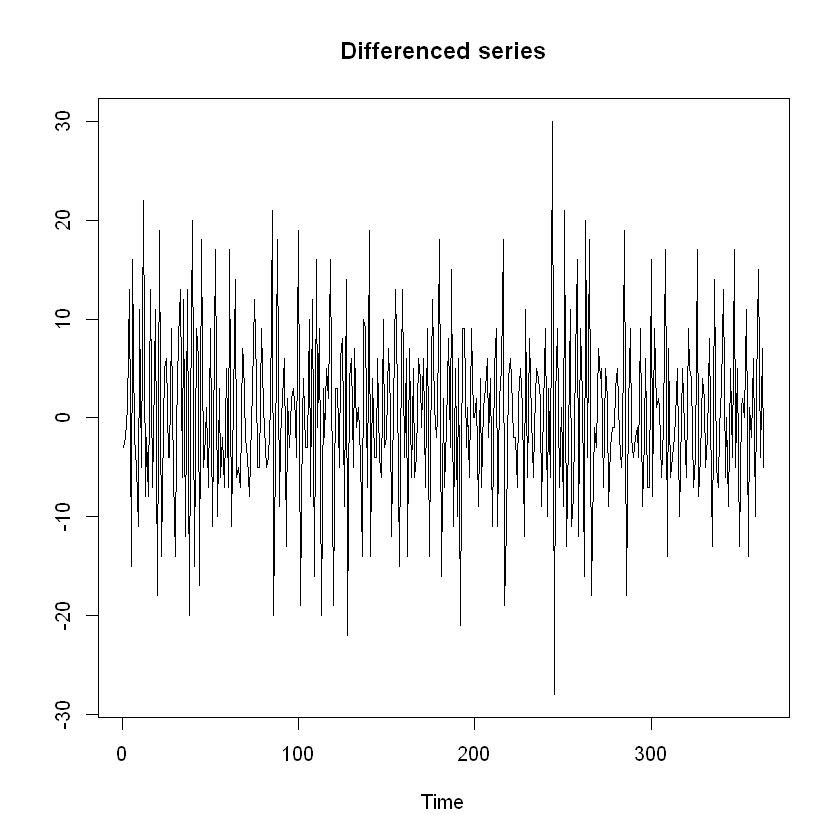

In [41]:
# Plot the differenced data
plot.ts(diff(number_of_births), main='Differenced series', ylab = '')

In [42]:
# Test for correlation in the differenced data
Box.test(diff(number_of_births), lag = log(length(diff(number_of_births))))


	Box-Pierce test

data:  diff(number_of_births)
X-squared = 78.094, df = 5.8972, p-value = 7.661e-15


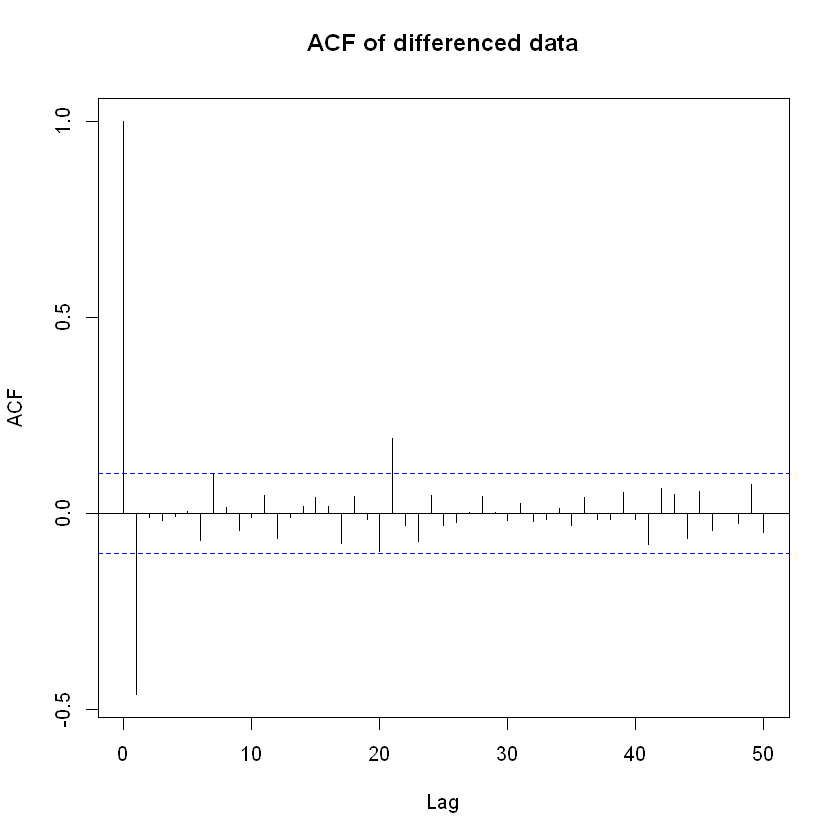

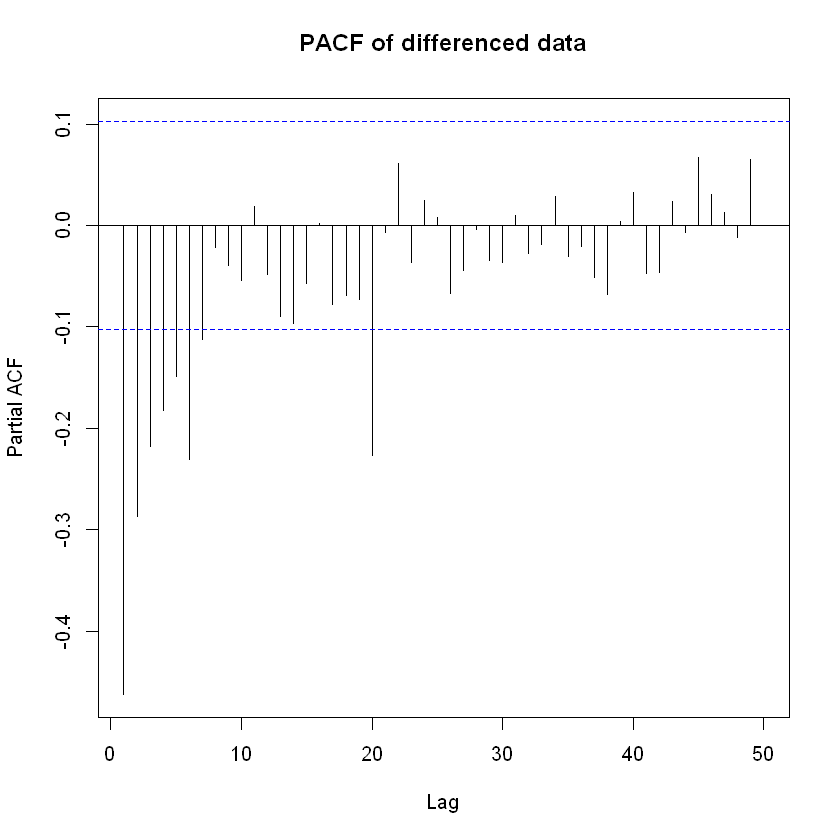

In [43]:
# acf and pacf of the differenced data
acf(diff(number_of_births), main='ACF of differenced data', 50)
pacf(diff(number_of_births), main='PACF of differenced data', 50)

In [44]:
# Fit various ARIMA models


model1<-arima(number_of_births, order=c(0,1,1))
SSE1<-sum(model1$residuals^2)
model1.test<-Box.test(model1$residuals, lag = log(length(model1$residuals)))

model2<-arima(number_of_births, order=c(0,1,2))
SSE2<-sum(model2$residuals^2)
model2.test<-Box.test(model2$residuals, lag = log(length(model2$residuals)))

model3<-arima(number_of_births, order=c(7,1,1))
SSE3<-sum(model3$residuals^2)
model3.test<-Box.test(model3$residuals, lag = log(length(model3$residuals)))

model4<-arima(number_of_births, order=c(7,1,2))
SSE4<-sum(model4$residuals^2)
model4.test<-Box.test(model4$residuals, lag = log(length(model4$residuals)))

df<-data.frame(row.names=c('AIC', 'SSE', 'p-value'), c(model1$aic, SSE1, model1.test$p.value), 
               c(model2$aic, SSE2, model2.test$p.value), c(model3$aic, SSE3, model3.test$p.value),
               c(model4$aic, SSE4, model4.test$p.value))
colnames(df)<-c('Arima(0,1,1)','Arima(0,1,2)', 'Arima(7,1,1)', 'Arima(7,1,2)')



format(df, scientific=FALSE)

,"Arima(0,1,1)","Arima(0,1,2)","Arima(7,1,1)","Arima(7,1,2)"
AIC,2462.2207021,2459.5705306,2464.8827225,2466.6664136
SSE,18148.4561632,17914.6513437,17584.3902548,17574.0578118
p-value,0.5333604,0.9859227,0.9999899,0.9999929


initial  value 2.216721 
iter   2 value 2.047518
iter   3 value 1.974780
iter   4 value 1.966955
iter   5 value 1.958906
iter   6 value 1.952299
iter   7 value 1.951439
iter   8 value 1.950801
iter   9 value 1.950797
iter  10 value 1.950650
iter  11 value 1.950646
iter  12 value 1.950638
iter  13 value 1.950635
iter  13 value 1.950635
iter  13 value 1.950635
final  value 1.950635 
converged
initial  value 1.950708 
iter   2 value 1.950564
iter   3 value 1.950290
iter   4 value 1.950196
iter   5 value 1.950185
iter   6 value 1.950185
iter   7 value 1.950185
iter   7 value 1.950185
iter   7 value 1.950185
final  value 1.950185 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), xreg = constant, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
          ma1      ma2  constant
      -0.8511  -0.1113     0.015
s.e.   0.0496   0.0502     0.015

sigma^2 estimated as 49.08:  log likelihood = -1226.36,  aic = 2460.72

$degrees_of_freedom
[1] 361

$ttable
         Estimate     SE  t.value p.value
ma1       -0.8511 0.0496 -17.1448  0.0000
ma2       -0.1113 0.0502  -2.2164  0.0273
constant   0.0150 0.0150   1.0007  0.3176

$AIC
[1] 6.760225

$AICc
[1] 6.760408

$BIC
[1] 6.803051


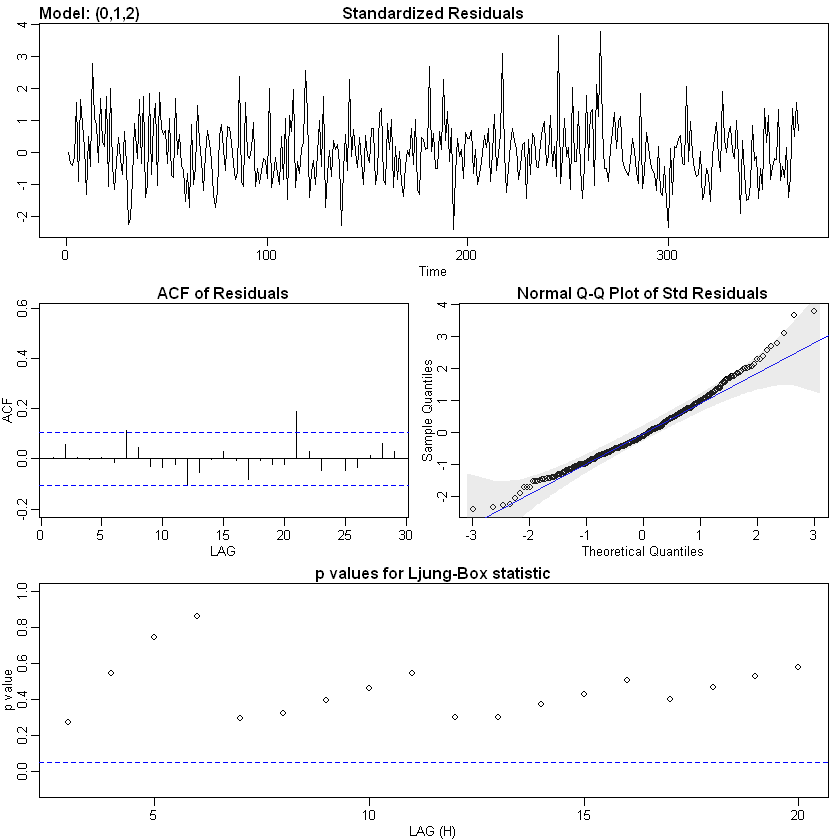

In [45]:
# Fit a SARIMA model
sarima(number_of_births, 0,1,2,0,0,0)